In [1]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')


In [2]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [3]:
# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.1.0
0.9.0


# 一、关联（Correlation）
##### 关联图表用于可视化2个或更多变量之间的关系。 也就是说，一个变量如何相对于另一个变化。

### 1 散点图（Scatter plot）
##### 散点图是用于研究两个变量之间关系的经典的和基本的图表。 如果数据中有多个组，则可能需要以不同颜色可视化每个组。 在 matplotlib 中，您可以使用 plt.scatterplot（） 方便地执行此操作。

In [4]:
# 导入数据
midwest = pd.read_csv("D:/GitHub/datasets/midwest_filter.csv")

In [5]:
# 数据处理
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i / float(len(categories) - 1)) for i in range(len(categories))]

In [12]:
categories

array(['AAR', 'AAU', 'AHR', 'ALR', 'ALU', 'HAR', 'HAU', 'HHR', 'HLR',
       'HLU', 'LAR', 'LAU', 'LHR', 'LHU'], dtype=object)

In [11]:
range(len(categories))

range(0, 14)

In [13]:
plt.cm.tab10(2 / float(len(categories) - 1))

(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)

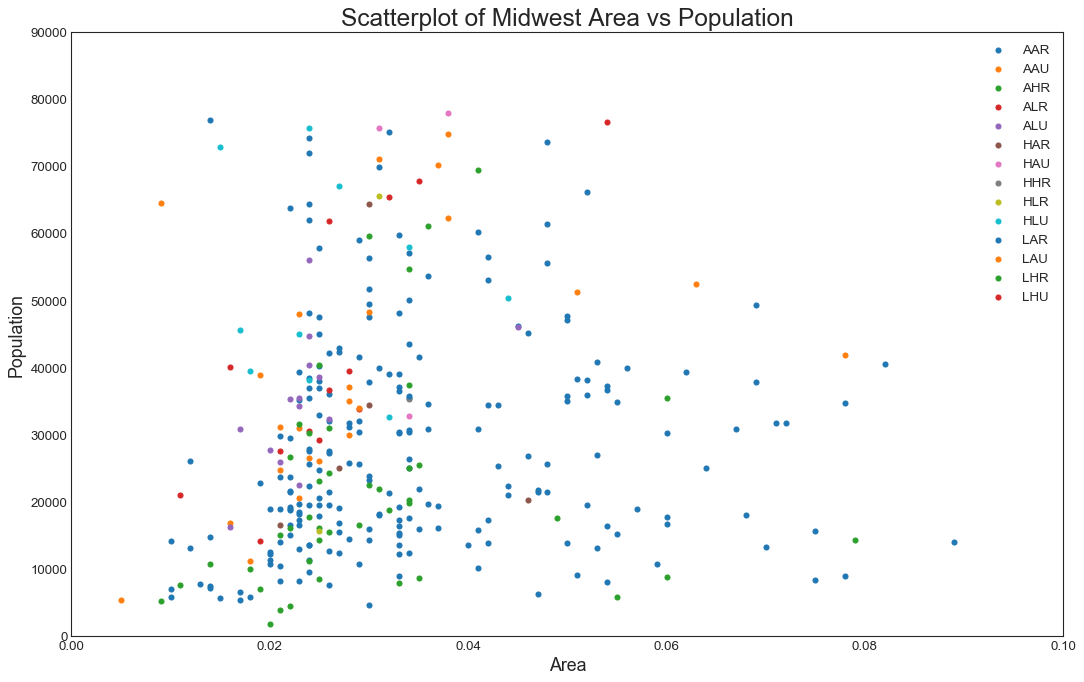

In [19]:
# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='b')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal',
                data=midwest.loc[midwest.category==category, :],
                s=20, cmap=colors[i], label=str(category))
    # "c=" 修改为 "cmap="，Python数据之道 备注

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)    
plt.show()